# Corto 1 

## Integrantes:

- Juan Diego Avila 20090
- Diego Franco 20240

## Parte 1 - Ejercicios Prácticos

## Tasks 1
Suponga que usted está trabajando en la industria relacionada con meteorología, por lo cual le interesa saber la
probabilidad de que haya **N** huracanes este año. Se sabe que la frecuencia histórica de huracanes es 7 por año, en
otras palabras, el número promedio de huracanes por año es de 7.


1. **¿Es este un escenario que se pueda modelar como una variable aleatoria de Poisson? ¿Por qué?**

Si ya que se tiene un intervalo de tiempo continuo y se tiene la frecuencia histórica en la que ocurre un huracán. Asimiso se tiene el promedio de huracanes por año y son eventos independientes. La distribución de Poisson es adecuada para modelar la ocurrencia de eventos raros en un rango de tiempo continuo.

2. **Considere que usted analizará hasta un máximo de 16 huracanes este año. Grafique PMF (probability mass
function) de estos eventos**

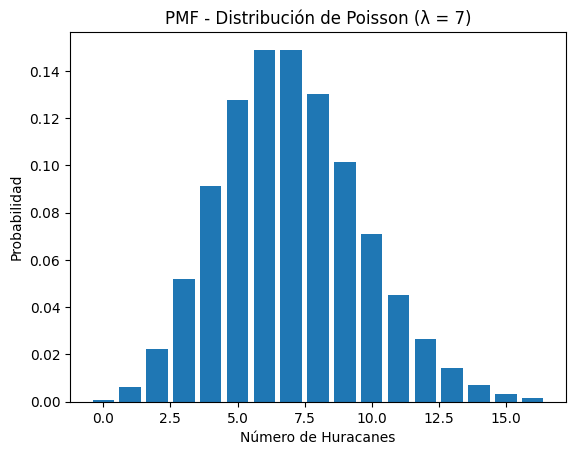

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import poisson

media = 7
maximo = 16

x = range(maximo + 1)
pmf_values = poisson.pmf(x, media)

plt.bar(x, pmf_values)
plt.xlabel('Número de Huracanes')
plt.ylabel('Probabilidad')
plt.title(f'PMF - Distribución de Poisson (λ = {media})')
plt.show()

3. **Considere que usted analizará hasta un máximo de 16 huracanes este año. Grafique CDF (cumulative
distribution function) de estos eventos**

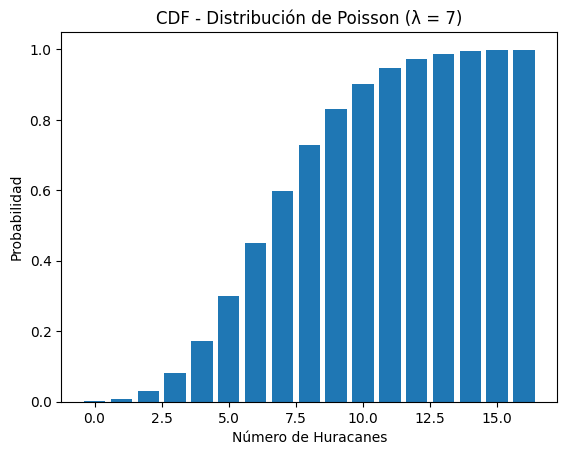

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import poisson

media = 7
maximo = 16

x = range(maximo + 1)
pmf_values = poisson.cdf(x, media)

plt.bar(x, pmf_values)
plt.xlabel('Número de Huracanes')
plt.ylabel('Probabilidad')
plt.title(f'CDF - Distribución de Poisson (λ = {media})')
plt.show()

4. **¿Qué conclusiones puede sacar al observar las gráficas de los ejercicios anteriores?**

- De la PMF se puede concluir que la probabilidad mas alta de ocurrencia de un huracán tiende siempre a la media, siendo desta de 7 huracanes al año. Disminuyendo la probabilidad de ocurrencia a medida que se aleja de la media.

- De la CMF indica que la probabilidad de que ocurran hasta cierta cantidad de huracanes al año. Cuando la cantidad de huracanes por año es de 7 o menor la probabilidad es de 0.5, y a medida de que se acerca a el limite de huracanes, la probabilidad tiene a 1.

- En general se puede observar la tendencia de cantidad de huracanes por año, lo que ayuda a entender la probabilidad de ocurrencia de huracanes, y permitir tomar decisiones en base a esto.

## Tasks 2
Usted es un analista de simulación encargado de modelar la llegada de clientes a una tienda minorista. Desea
simular la cantidad de clientes que llegan por hora utilizando dos métodos diferentes: el método de transformación
inversa y el método de rechazo.


### Task 2.1
Defina la distribución de probabilidad objetivo para las llegadas de clientes en función de los datos históricos.
Supongamos que ha recopilado datos y descubrió que la cantidad de clientes que llegan por hora sigue una
distribución de Poisson con un promedio de 10 clientes por hora (λ = 10).

1. **Implemente el método de transformación inversa para generar muestras aleatorias a partir de la
distribución de Poisson**

In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import poisson


def poisson_cdf(lmbda, k):
    cdf = 0
    for i in range(k + 1):
        cdf += (lmbda ** i) * np.exp(-lmbda) / math.factorial(i)
    return cdf

def poisson_inversa_cdf(lmbda, y):
    k = 0
    cdf = poisson_cdf(lmbda, k)
    while cdf < y:
        k += 1
        cdf = poisson_cdf(lmbda, k)
    return k

def generar_muestra_poisson(num_samples, lmbda):
    samples = []
    for _ in range(num_samples):
        U = np.random.uniform()
        x = poisson_inversa_cdf(lmbda, U)
        samples.append(x)
    return samples




2. **Genere una muestra aleatoria de tamaño 1000 que represente el número de clientes que llegan en una
hora.**


In [32]:
promedio_por_hora = 10
tamanio_muestra = 1000

muestra_aleatoria = generar_muestra_poisson(tamanio_muestra, promedio_por_hora)


3. **Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución de Poisson.**

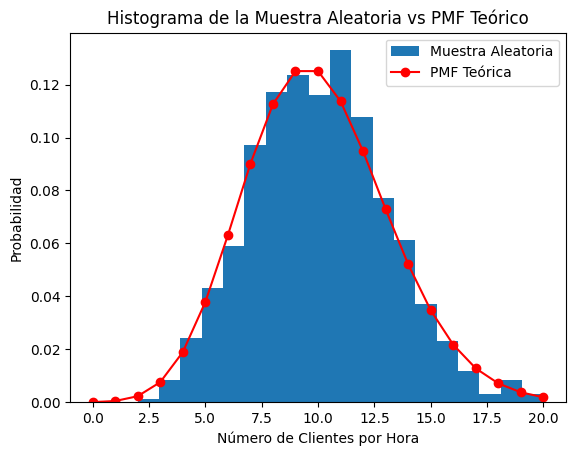

In [33]:

histograma, bins, _ = plt.hist(muestra_aleatoria, bins=max(muestra_aleatoria)-min(muestra_aleatoria)+1, density=True, label='Muestra Aleatoria')
x = np.arange(0, max(muestra_aleatoria)+1)
pmf_teorica = [poisson.pmf(k, promedio_por_hora) for k in x]
plt.plot(x, pmf_teorica, 'ro-', label='PMF Teórica')
plt.title('Histograma de la Muestra Aleatoria vs PMF Teórico')
plt.xlabel('Número de Clientes por Hora')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

4. **Calcule la media y la varianza de la muestra generada y compárelas con los valores teóricos.**


In [36]:
media_muestra = np.mean(muestra_aleatoria)
varianza_muestra = np.var(muestra_aleatoria)

media_teórica = promedio_por_hora
varianza_teórica = promedio_por_hora

print("Media de la muestra generada:", media_muestra)
print("Media teórica:", media_teórica)
print("Varianza de la muestra generada:", varianza_muestra)
print("Varianza teórica:", varianza_teórica)


Media de la muestra generada: 10.045
Media teórica: 10
Varianza de la muestra generada: 10.056975
Varianza teórica: 10


Como se puede observar el valor de la media de la muestra generada es bastante cercano al valor teórico, por lo que se puede concluir que la muestra generada es representativa de la distribución teórica.

Por otro lado sobre la comparacion de las variazas se puede observar que el valor de la varianza de la muestra generada es bastante cercano al valor teórico, por lo que se puede concluir que la dispersion de los datos de la muestra generada es consistente con la de la distribución teórica.

## Task 2.2
Defina una distribución de propuesta que sea más fácil de muestrear y que cubra el soporte de la distribución de
Poisson de destino. Por ejemplo, puede elegir una distribución uniforme o geométrica.

1. Calcule la constante C para acotar la relación entre el PMF objetivo y el PMF propuesto en todo el soporte
de la distribución de Poisson

In [120]:
# Se va a utilizar una distribucion uniforme

import numpy as np
from scipy.stats import poisson

lmbda = 10

def calcualr_C(lmbda, k):
    p = 1 / (lmbda + 1)
    max_poisson_pmf = poisson.pmf(lmbda, k)
    max_geom_pmf = p * (1 - p) ** k
    C = max_poisson_pmf / max_geom_pmf
    return C

2. **Implemente el método de rechazo para generar muestras aleatorias a partir de la distribución de Poisson.**

In [132]:

def pmf_geometrica(x, p):
    return p * (1 - p) ** (x - 1)

def metodo_de_rechazo(size):
    C = calcualr_C(lmbda, size)
    p = 1 / lmbda
    samples = []
    while len(samples) < size:
        x_geom = np.random.geometric(p)  
        u = np.random.uniform()  
        if u <= poisson.pmf(x_geom, lmbda) / (C * pmf_geometrica(x_geom, p)):
            samples.append(x_geom)
    return samples


3. **Genere una muestra aleatoria de tamaño 1000 que represente el número de clientes que llegan en una hora
utilizando el método de rechazo**

In [133]:
muestra_aleatoria = metodo_de_rechazo(1000)

print(muestra_aleatoria)

[19, 11, 3, 12, 2, 23, 3, 26, 10, 2, 18, 5, 1, 29, 11, 4, 8, 12, 3, 2, 13, 20, 1, 18, 1, 14, 9, 2, 8, 14, 3, 5, 12, 25, 12, 16, 19, 5, 4, 8, 35, 5, 1, 29, 1, 18, 9, 9, 2, 5, 7, 11, 20, 20, 2, 6, 12, 25, 1, 16, 3, 11, 4, 23, 14, 13, 23, 26, 13, 12, 15, 5, 45, 16, 8, 1, 1, 5, 12, 1, 12, 15, 6, 7, 9, 14, 15, 3, 11, 19, 34, 9, 1, 34, 2, 7, 15, 1, 5, 17, 1, 1, 19, 19, 6, 8, 5, 5, 9, 14, 2, 2, 9, 9, 8, 3, 8, 3, 43, 23, 2, 1, 25, 10, 13, 38, 4, 21, 9, 30, 18, 5, 13, 2, 28, 3, 8, 1, 4, 1, 10, 7, 3, 6, 4, 2, 8, 1, 2, 2, 7, 14, 14, 12, 7, 6, 1, 10, 2, 17, 8, 27, 15, 4, 2, 11, 3, 22, 13, 1, 1, 47, 11, 8, 9, 4, 4, 33, 4, 6, 1, 23, 13, 12, 12, 14, 16, 5, 3, 4, 4, 5, 14, 19, 4, 8, 2, 2, 7, 2, 5, 5, 5, 6, 3, 5, 22, 6, 3, 1, 23, 25, 33, 4, 57, 7, 8, 14, 30, 1, 11, 4, 3, 13, 12, 1, 9, 6, 6, 4, 11, 15, 3, 9, 1, 7, 6, 4, 6, 15, 3, 21, 49, 18, 31, 14, 3, 8, 16, 8, 3, 21, 15, 5, 19, 10, 4, 4, 12, 10, 28, 6, 17, 14, 12, 2, 23, 36, 3, 7, 7, 26, 25, 1, 16, 15, 24, 9, 5, 1, 1, 17, 9, 13, 7, 1, 32, 28, 15, 2, 5

C:\Users\diego\AppData\Local\Temp\ipykernel_17496\4120136128.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  if u <= poisson.pmf(x_geom, lmbda) / (C * pmf_geometrica(x_geom, p)):


4. **Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución de Poisson**

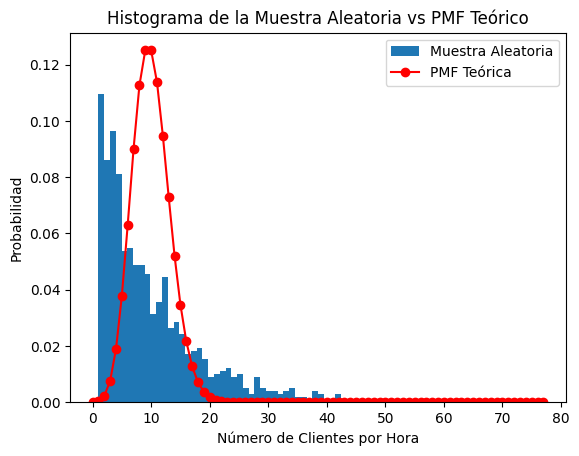

In [134]:
histograma, bins, _ = plt.hist(muestra_aleatoria, bins=max(muestra_aleatoria)-min(muestra_aleatoria)+1, density=True, label='Muestra Aleatoria')
x = np.arange(0, max(muestra_aleatoria)+1)
pmf_teorica = [poisson.pmf(k, lmbda) for k in x]
plt.plot(x, pmf_teorica, 'ro-', label='PMF Teórica')
plt.title('Histograma de la Muestra Aleatoria vs PMF Teórico')
plt.xlabel('Número de Clientes por Hora')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

5. **Calcule la media y la varianza de la muestra generada y compárelas con los valores teóricos.**


In [135]:
media_muestra = np.mean(muestra_aleatoria)
varianza_muestra = np.var(muestra_aleatoria)

media_teórica = lmbda
varianza_teórica = lmbda

print("Media de la muestra generada:", media_muestra)
print("Media teórica:", media_teórica)
print("Varianza de la muestra generada:", varianza_muestra)
print("Varianza teórica:", varianza_teórica)

Media de la muestra generada: 9.793
Media teórica: 10
Varianza de la muestra generada: 86.60815099999998
Varianza teórica: 10


Al comparar el valor de la media de la muestra generada y la muestra teórica se puede observar que son valores bastante cercanos, por lo que se cocnluye que la muestra que se generó se asemeja bastante a la distribución teórica.

Por otro lado sobre la comparacion de las variazas se puede observar que el valor de la varianza de la muestra generada es bastante alta en comparación con el valor teórico, por lo que se puede concluir que la dispersion de los datos de la muestra generada es mayor a la de la distribución teórica.

## Responda:
1. Compare los resultados de los dos métodos. ¿Qué método proporciona un mejor ajuste a la distribución de Poisson objetivo?
    * Como se pudo observar, los dos metodos dieron buenos resultados, pero el que tiene mejor ajuste a la distribución de Poisson objetivo es el método de tranformación inversa, ya que los puntos en la gráfica se encuentran más cerca de la línea de la distribución de Poisson objetivo y los valores tanto de media y varianza se encuentran más cerca de los valores de la distribución de Poisson objetivo. Cabe mencionar que en el metodo de rechazo los valores generados muestran una dispercion bastante mayor a la de la inversa lo que hace que el modelo no sea tan bueno.


2. Discuta las ventajas y desventajas de cada método en términos de eficiencia y precisión.
    * Ventajas:
        * Método de transformación inversa: 
            * El método de transformación inversa genera valores que si se ajustan a la distribución de Poisson objetivo.
            * En general, este método es más eficiente que el método de rechazo y mas acertado, lo que se pudo demostrar con la comparacion de los valores generados y teoricos.
        * Método de rechazo:
            * El método de rechazo es más flexible y puede aplicarse a una amplia gama de distribuciones de Poisson.
            * La implementación del método de rechazo es más simple.
       
    * Desventajas:
        * Método de transformación inversa: 
            * En algunos casos, encontrar la función inversa  puede ser complicado o incluso imposible.
            * El método de transformación inversa puede no ser adecuado para algunas distribuciones de Poisson complejas.
        * Método de rechazo:
            * El método de rechazo puede ser menos eficiente, especialmente cuando la tasa de rechazo de valores generados es alta.
    

3. Considere diferentes escenarios, como cambiar la tasa de llegada promedio (λ) o usar diferentes distribuciones de propuestas. ¿Cómo funcionan los métodos en estos escenarios?
    * El metodo que mejor funcionaria para diferentes distribuciones propuestas seria el de rechazo, por su flexibilidad y facilidad de implementación.
    * Si cambia la tasa de llegada promedio (λ) el metodo que mejor funcionaria seria el de transformación inversa, ya que este metodo genera valores que se ajustan a la distribución de Poisson objetivo.
    